# Cluster analysis of sequential image data

- read image file from the directory 'data'
- the first label of the file name is the enzyme
- the last digit of the file name is the duration of the treatement

The code reads multiple sequential image files.
n number of images with p x q dimension are converted into 2-dimensiona array of n(time) x (pxq: flattend image in 1d).


In [1]:
%matplotlib inline
# coding: utf-8
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from common.smooth import savitzky_golay
from common.file_IO import load_files
from sklearn.cluster import KMeans
from random import randrange, choice
from PIL import Image
import pandas as pd
from tqdm import tqdm

Ximg = 500
Yimg = 500

image_dir='./data'
enzyme_type = ['CBH1']


In [2]:
k=0
fluor_image, fluor_label, bf_image, bf_label = load_files(image_dir,enzyme_type[0],Ximg,Yimg)
# fluor_image のストラクチャー
df_f=pd.DataFrame(fluor_image)
df_f

,0,1,2,3,4,5,6,7,8,9,...,249990,249991,249992,249993,249994,249995,249996,249997,249998,249999
0,0.027451,0.023529,0.023529,0.019608,0.019608,0.023529,0.019608,0.015686,0.015686,0.019608,...,0.031373,0.031373,0.035294,0.031373,0.035294,0.035294,0.035294,0.043137,0.047059,0.054902
1,0.023529,0.023529,0.023529,0.019608,0.015686,0.015686,0.019608,0.015686,0.019608,0.019608,...,0.039216,0.043137,0.043137,0.043137,0.043137,0.043137,0.043137,0.054902,0.058824,0.062745
2,0.019608,0.019608,0.019608,0.019608,0.015686,0.019608,0.015686,0.015686,0.019608,0.019608,...,0.039216,0.035294,0.039216,0.039216,0.039216,0.043137,0.047059,0.054902,0.058824,0.058824
3,0.019608,0.015686,0.019608,0.019608,0.019608,0.019608,0.023529,0.023529,0.019608,0.019608,...,0.043137,0.043137,0.039216,0.035294,0.039216,0.043137,0.047059,0.054902,0.062745,0.062745
4,0.023529,0.019608,0.019608,0.019608,0.019608,0.023529,0.019608,0.015686,0.019608,0.023529,...,0.043137,0.039216,0.039216,0.043137,0.039216,0.047059,0.047059,0.050980,0.058824,0.062745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.023529,0.023529,0.019608,0.019608,0.019608,0.019608,0.015686,0.015686,0.015686,0.019608,...,0.019608,0.019608,0.019608,0.023529,0.023529,0.019608,0.015686,0.011765,0.015686,0.015686
58,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.015686,0.015686,0.015686,0.019608,...,0.015686,0.015686,0.015686,0.019608,0.023529,0.023529,0.019608,0.023529,0.015686,0.019608
59,0.023529,0.019608,0.019608,0.015686,0.019608,0.019608,0.019608,0.019608,0.023529,0.019608,...,0.019608,0.019608,0.019608,0.019608,0.019608,0.023529,0.023529,0.019608,0.019608,0.015686
60,0.015686,0.015686,0.015686,0.015686,0.019608,0.023529,0.019608,0.015686,0.023529,0.023529,...,0.019608,0.015686,0.015686,0.023529,0.023529,0.019608,0.015686,0.015686,0.019608,0.015686


In [3]:
flsm_lines = []
for n in tqdm(range(0,fluor_image[1].size,1)):
    flsm_lines.append(savitzky_golay(fluor_image[:62,n], 11, 3))
flsm_lines = np.asarray(flsm_lines)
#
brsm_lines = []
for m in tqdm(range(0,bf_image[1].size,1)):
    brsm_lines.append(savitzky_golay(bf_image[:13,m], 5, 3))
brsm_lines = np.asarray(brsm_lines)
#

100%|█████████████████████████████████| 250000/250000 [00:28<00:00, 8799.50it/s]


In [4]:
# flsm_lines = fluor_image　のデータをスムージング savitzky-golay 関数 11 points 3 order function
df_smoothed=pd.DataFrame(flsm_lines)
df_smoothed

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,0.022277,0.023072,0.022661,0.021875,0.020952,0.020961,0.021336,0.021838,0.021637,0.021381,...,0.018209,0.018474,0.018831,0.020348,0.020952,0.020732,0.019626,0.018703,0.017871,0.017871
1,0.021153,0.021436,0.020888,0.019178,0.018447,0.018365,0.018365,0.018950,0.020028,0.020915,...,0.017697,0.017560,0.017515,0.018721,0.019370,0.019882,0.019187,0.018356,0.017798,0.017423
2,0.022615,0.021738,0.021006,0.020092,0.018995,0.018547,0.018182,0.018401,0.019772,0.020632,...,0.017807,0.017944,0.017524,0.018776,0.019233,0.018895,0.019069,0.018831,0.019754,0.019608
3,0.020266,0.019855,0.019123,0.018575,0.018209,0.018026,0.017697,0.017633,0.019142,0.019900,...,0.017944,0.017807,0.018273,0.018602,0.018557,0.017807,0.017332,0.018109,0.018977,0.019608
4,0.016811,0.017323,0.017131,0.018136,0.019005,0.018904,0.019078,0.019105,0.019133,0.019480,...,0.018767,0.019078,0.019900,0.020074,0.019836,0.019928,0.020019,0.019279,0.019608,0.019608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,0.035294,0.039764,0.041976,0.043146,0.043092,0.040230,0.037616,0.036163,0.035632,0.035376,...,0.017871,0.018191,0.018685,0.020750,0.021655,0.021966,0.021262,0.021025,0.021162,0.021674
249996,0.035294,0.040349,0.043229,0.045295,0.045679,0.043448,0.041236,0.039536,0.038932,0.040495,...,0.019626,0.018803,0.017834,0.018950,0.018675,0.018502,0.017533,0.017670,0.018410,0.019014
249997,0.043137,0.047397,0.051620,0.054527,0.054271,0.051081,0.047589,0.045953,0.044947,0.045733,...,0.019343,0.019708,0.019836,0.020623,0.020668,0.019644,0.019690,0.019315,0.018100,0.019754
249998,0.047059,0.052927,0.056858,0.059052,0.059381,0.056822,0.053915,0.053055,0.052516,0.053220,...,0.018977,0.019087,0.018310,0.017807,0.017579,0.017624,0.017944,0.018209,0.018328,0.019608


#### sckit learn k-means 
- class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
> https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [5]:
num_clusters=8
pred = KMeans(n_clusters=num_clusters).fit(df_smoothed)

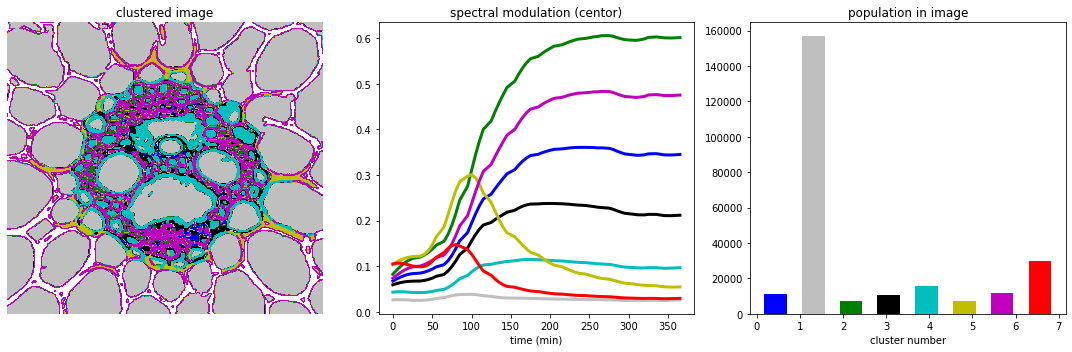

In [6]:
# display histogram and then sort (colors) labels in decreasing order
colorlist = ["0.75", "r", "c", "m", "b", "k", "g","y"] # needs to modify depending on the num_clusters
#
def sort_colorlist(c_order,colorlist):
    clist = ['a']*len(colorlist)
    for k in range(len(clist)):
        clist[c_order[k]]= colorlist[k]
    return clist

interval = np.arange(-.5,7.5,1)
order, _=np.histogram(pred.labels_, bins=num_clusters)
c_order=np.argsort(order)[::-1]
# adjusted colorlist for presentation: background would be in grey
adj_colorlist=sort_colorlist(c_order,colorlist)
#
fig, ax = plt.subplots(ncols=3,figsize=(15,5))
ax[0].contourf(pred.labels_.reshape(Ximg,Yimg),interval, colors=adj_colorlist)
ax[0].axis('off')
ax[0].set_title('clustered image')
#
for i in range(num_clusters):
    ax[1].plot(fluor_label[:62],pred.cluster_centers_[i],c=adj_colorlist[i],linewidth=3)
ax[1].set_title('spectral modulation (centor)')
ax[1].set_xlabel('time (min)')
#
n, bins, patches = ax[2].hist(pred.labels_, bins=num_clusters, rwidth=0.6)
for i in range(num_clusters):
    patches[i].set_facecolor(adj_colorlist[i])
ax[2].set_title('population in image')
ax[2].set_xlabel('cluster number')
plt.tight_layout()
plt.show()

# randomly 300 extracted profiles

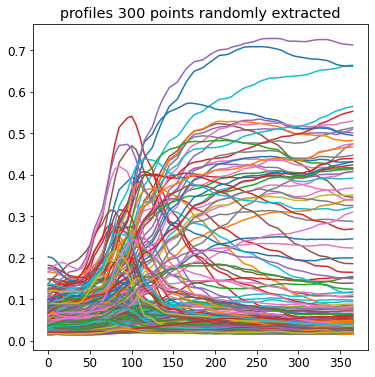

In [7]:
ext_pnt = np.random.randint(0,fluor_image[0].size,300)
#
tflsm_lines = flsm_lines.T
fig =  plt.figure(figsize=(6,6))
plt.rcParams["font.size"] = 12
plt.title("profiles 300 points randomly extracted")
plt.plot(fluor_label[:62],tflsm_lines[:62,ext_pnt])

#fig.savefig('./result/20190324extracted.jpg', dpi=600)
plt.show()